In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Lectura de los CSV y comprobación de formato

In [6]:
rutaGeneral = "C:/Users/elsac/Documents/Master/TFM/Datos/"

In [8]:
p_1= pd.read_csv(rutaGeneral+"activities_1/csv/all_1.csv")
p_2= pd.read_csv(rutaGeneral+"activities_2/csv/all_2.csv")
p_3= pd.read_csv(rutaGeneral+"activities_3/csv/all_3.csv")
p_4= pd.read_csv(rutaGeneral+"activities_4/csv/all_4.csv")
p_5= pd.read_csv(rutaGeneral+"activities_5/csv/all_5.csv")
p_6= pd.read_csv(rutaGeneral+"activities_6/csv/all_6.csv")
p_7= pd.read_csv(rutaGeneral+"activities_7/csv/all_7.csv")

In [9]:
frames = [p_1,p_2,p_3,p_4,p_5,p_6,p_7]
result = pd.concat(frames)

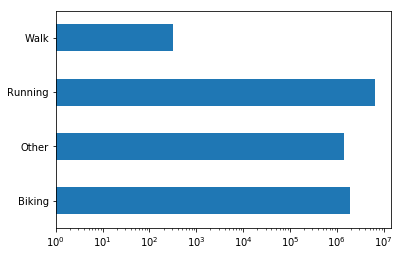

In [10]:
result.sport =  result.sport.apply(lambda elt: str(elt))
result.sport =  result.sport.apply(lambda elt: 'Running' if elt=='Run' or elt=='running' or elt=='9' 
                                                                       or elt=='1' or elt=='4' or elt =='nan'
                                                                       or elt == '10'
                                                                       else elt)
result.sport.value_counts().sort_index().plot.barh(log=True)


In [11]:
result.sport.unique()
result.sport.value_counts().values

array(['Running', 'Biking', 'Other', 'Walk'], dtype=object)

array([6423874, 1906777, 1409513,     319], dtype=int64)

['Running' 'Biking' 'Other' 'Walk']
[6423874 1906777 1409513     319]


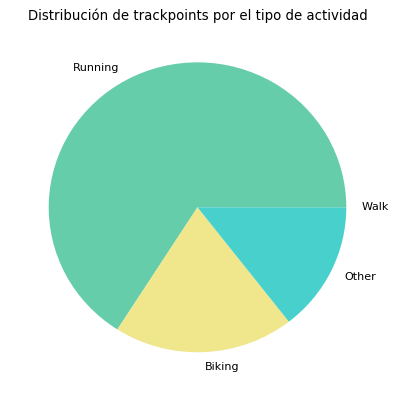

In [12]:
result.sport =  result.sport.apply(lambda elt: str(elt))
result.sport =  result.sport.apply(lambda elt: 'Other' if elt=='nan' else elt)
result.sport =  result.sport.apply(lambda elt: 'Running' if elt=='Run' or elt=='running' or elt=='9' else elt)
sports= result.sport.unique()
print(sports)
freq = result.sport.value_counts().values
print(freq)
colores = ['mediumaquamarine', 'khaki', 'mediumturquoise', 'y', 'darkgreen', 'blue', 'yellow']
figura=plt.figure(figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
title = plt.title('Distribución de trackpoints por el tipo de actividad' )
plot = plt.pie(freq, labels = sports, colors = colores, startangle = 0)

#### Visualización de actividades por persona

In [142]:
def plotActivities(dfs):
    
    persona = 1
    
    for i in np.arange(0, len(dfs)-1):

        dfs[i].sport =  dfs[i].sport.apply(lambda elt: str(elt))
        dfs[i].sport =  dfs[i].sport.apply(lambda elt: 'Other' if elt=='nan' else elt)
        dfs[i].sport =  dfs[i].sport.apply(lambda elt: 'Running' if elt=='Run' or elt=='running' else elt)
        sports= dfs[i].sport.unique()
        freq = dfs[i].sport.value_counts().values
        haymenor = len(freq[freq<6000])
        if(haymenor >= 1): haymenor = 1
        colores = ['mediumaquamarine', 'khaki', 'mediumturquoise', 'y', 'darkgreen']
        figura=plt.figure(figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
        title = plt.title('Distribución de trackpoints por el tipo de actividad de P'+ str(persona) )
        exp = tuple(np.append(np.repeat(0.01,len(sports)-haymenor),np.repeat(0.1,haymenor)))
        plot = plt.pie(freq, labels = sports, colors = colores, startangle = 0, explode = exp)
        persona = persona+1
        

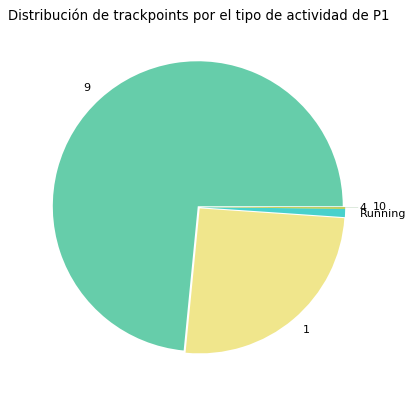

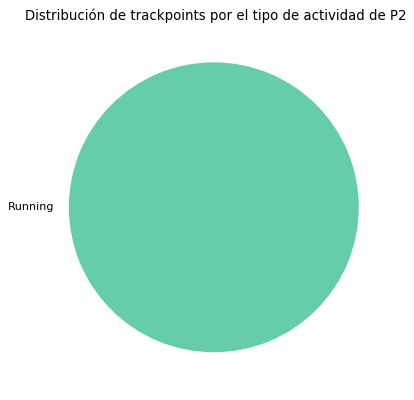

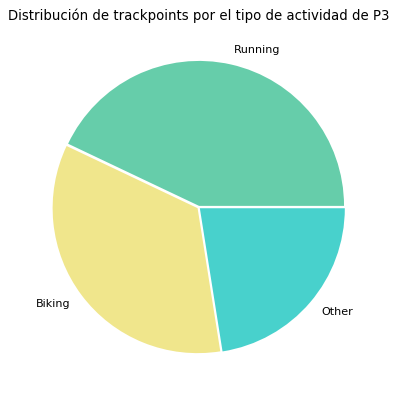

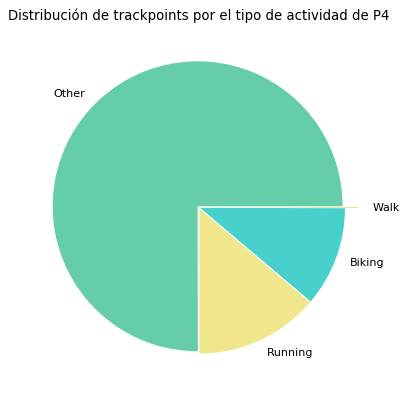

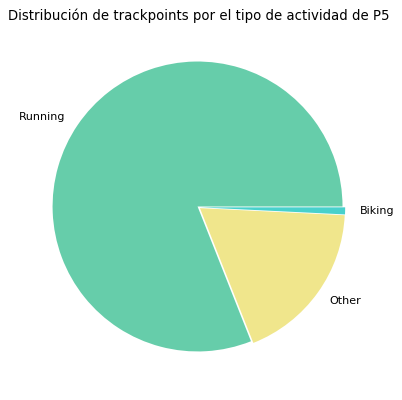

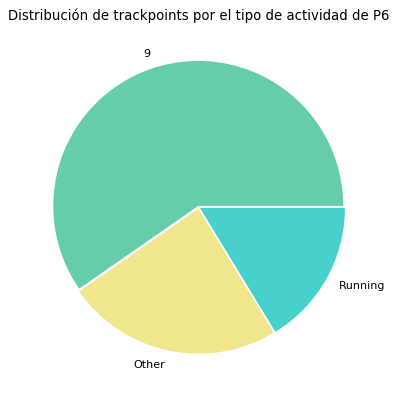

In [143]:

plotActivities(dfs)
